# Assignment 2 - Individual Checkpoint 2
- Group ID: DATA3406-CC01-3
- Driving Problem: "How well do these people meet the recommendation of at least 150 minutes of moderate activity per week?"
- Personal Planning and Progress Github wiki page: https://github.sydney.edu.au/DATA3406-CC01-G03/DATA3406_2023_CC01_G03_A2/wiki/Shaun-Lim's-Personal-Planning-and-Progress
- Database IDs of the three people: 4558609924, 4702921684, 5553957443
- The ID of the person I chose is 5553957443 and I planned to segment out the number moderate activity minutes defined by a global standard measure of moderate activity.

---
## Data Loading 
We first import necessary libraries and load the data for each individual. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data via csv files for each individual 
daily_steps = pd.read_csv('dailySteps_merged.csv')
hourly_steps = pd.read_csv('hourlySteps_merged.csv')
minute_steps = pd.read_csv('minuteStepsWide_merged.csv')

## Initial Data Inspection 
Objective: Explore top rows of data to ensure that the correct dataset is used.

In [2]:
minute_steps.head()

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,0,9,8,0,20,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Extracting Data for a Specific User
Objective: Our aim is to filter and extract minute-level step data for a specific user from our dataset.

In [3]:
# Get unique IDs
unique_ids = minute_steps["Id"].unique()

# Select one ID from my three unique IDs
one_id = unique_ids[19]  

# Filter the data to include only the selected unique ID
filtered_minute = minute_steps[minute_steps["Id"] == one_id]

filtered_minute.head()

,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
12435,5553957443,4/13/2016 12:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12436,5553957443,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12437,5553957443,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12438,5553957443,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12439,5553957443,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1. **Identifying Unique Users:** 
To ensure that we are analyzing distinct users, we need to identify all the unique user IDs in the dataset.
2. **Selecting a Specific User:**
For our current analysis, we're interested in the data of a user whose ID is the 20th in our list of unique IDs.
3. **Filtering Data for the Selected User:** 
Now that we have our target user's ID, we'll extract all the rows in our dataset that belong to this user.

## Defining Moderate Activity
- We defined moderate activity as 100 steps per minute. This measurement is based on various studies such as: 
    - "Walk this way" by Harvard Medical School
    - "Walking cadence (steps/min) and intensity in 41 to 60-year-old adults: the CADENCE-adults study" by International Journal of Behavioral Nutrition and Physical Activity
    - "How fast is fast enough? Walking cadence (steps/min) as a practical estimate of intensity in adults: a narrative review" by British Journal of Sports Medicine.

## Counting Moderate-Activity Minutes
Objective: We aim to find out the total number of minutes during which the step count exceeded 100 steps to check whether there are any moderate activity minutes for the person.

In [4]:
# Generate step column names
all_step_columns = ['Steps{:02}'.format(i) for i in range(60)]

# Count the number of steps in each minute that are larger than 100
count_large_steps = (filtered_minute[all_step_columns] > 100).sum().sum()

count_large_steps

760

1. **Selecting Step Columns:**
First, we need to isolate the columns in our dataset that record the step counts for each minute. Since our dataset's structure places these columns after the 'Id' and 'ActivityHour' columns, we can select all columns starting from the third one.
2. **Identifying High-Activity Minutes:**
Next, we want to pinpoint the minutes where the step count was greater than 100 and found 760 moderate activity minutes.

## Make A Copy (Filtered Dataset)
Objective: We make a copy of the original filtered dataset to allow manipulation towards the dataset.

In [5]:
filtered_minute_copy = filtered_minute.copy()

## Enhancing the Dataset with Weekly Labels
Objective: We aim to enrich our dataset by adding a new column that labels each entry with the corresponding week it belongs to, based on the ActivityHour column.

In [6]:
# Convert 'ActivityHour' to datetime format
filtered_minute_copy['ActivityHour'] = pd.to_datetime(filtered_minute_copy['ActivityHour'])

# Calculate the difference in weeks from the minimum date in 'ActivityHour'
filtered_minute_copy['Week_Number'] = ((filtered_minute_copy['ActivityHour'] - filtered_minute_copy['ActivityHour'].min()).dt.days // 7) + 1

# Label the weeks as "Week 1", "Week 2", etc.
filtered_minute_copy['Activity Week'] = 'Week ' + filtered_minute_copy['Week_Number'].astype(str)

# Drop the "Week_Number" column
filtered_minute_copy = filtered_minute_copy.drop("Week_Number", axis=1)

# Reorder the columns to place "Activity Week" after "ActivityHour"
columns_order = ['Id', 'ActivityHour', 'Activity Week'] + [col for col in filtered_minute_copy.columns if col not in ['Id', 'ActivityHour', 'Activity Week']]
reordered_minute = filtered_minute_copy[columns_order]

# Display the reordered DataFrame
reordered_minute.head()


,Id,ActivityHour,Activity Week,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
12435,5553957443,2016-04-13 00:00:00,Week 1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12436,5553957443,2016-04-13 01:00:00,Week 1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12437,5553957443,2016-04-13 02:00:00,Week 1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12438,5553957443,2016-04-13 03:00:00,Week 1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12439,5553957443,2016-04-13 04:00:00,Week 1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1. **Ensuring Correct Date Format:**
To work with date-related operations, it's essential to ensure our date column is in the right format.
2. **Calculating Week Number:**
To label our data by weeks, we first determine the week number for each entry. We compute this by finding the difference in days between each date and the earliest date in the dataset, then dividing by 7 to get the week number. The addition +1 is to make the week start with 1 instead of 0. Without the +1, the very first week would be considered 0 and by adding 1, the first week is week 1, second week is week 2 and so on.
3. **Creating Week Labels:**
For better readability, we'll convert the numeric week numbers into string labels like "Week 1", "Week 2", and so on.
4. **Cleaning Up:**
Now that we have our "Activity Week" labels, we no longer need the numeric "Week_Number" column. So, we'll remove it.
5. **Reordering Columns for Clarity:**
To make our dataset more intuitive, we'll rearrange the columns to place the new "Activity Week" column right after "ActivityHour".
6. **Previewing the Enhanced Dataset:**
Finally, to verify our changes, we'll display the first few rows of the modified dataframe.

## Make A Copy (Reordered Dataset)
Objective: We make a copy of the reordered dataset to allow further manipulation towards the dataset.

In [7]:
# Create a copy of reordered_minute
reordered_minute_copy = reordered_minute.copy()

## Analyzing Moderate-Activity Minutes on a Weekly Basis
Objective: We aim to determine the number of minutes per week during which the step count exceeded 100 steps.

In [8]:
# Generate step column names
all_step_columns = ['Steps{:02}'.format(i) for i in range(60)]

# Filter the DataFrame to consider only step columns and check if the steps are > 100
over_100_steps_all = reordered_minute_copy[all_step_columns] > 100

# Use .loc to assign the values and avoid the warning
reordered_minute_copy.loc[:, 'Over_100_Count_All'] = over_100_steps_all.sum(axis=1)

# Group by 'Activity Week' and sum the counts
weekly_over_100_counts_copy = reordered_minute_copy.groupby('Activity Week')['Over_100_Count_All'].sum()

weekly_over_100_counts_copy

Activity Week
Week 1    216
Week 2    136
Week 3    189
Week 4    195
Week 5     24
Name: Over_100_Count_All, dtype: int64

1. **Generating Step Column Names:**
Our dataset breaks down step counts minute-by-minute for each hour. To facilitate our analysis, we first generate the column names corresponding to these minute-by-minute step counts. This line uses a list comprehension to create a list of column names ranging from "Steps00" to "Steps59".
2. **Identifying High-Activity Minutes:**
Next, we filter our dataframe to focus only on the step columns. For each minute, we check if the step count was greater than 100.
3. **Counting High-Activity Minutes for Each Hour:**
We then sum up the True values for each row (i.e., each hour) to get the number of moderate-activity minutes in that hour.
4. **Aggregating Data on a Weekly Basis:**
Finally, we group our data by the "Activity Week" labels and sum up the counts of moderate-activity minutes for each week. 

## Transforming and Organizing Weekly Activity Data
Objective: We aim to restructure our weekly high-activity data into a well-organized DataFrame, making it easier to interpret and visualize.

In [9]:
# Convert the series to a DataFrame
activity_df = weekly_over_100_counts_copy.reset_index()

# Rename the columns
activity_df.columns = ['Activity Week', 'Moderate Activity Minute']

# Sort the DataFrame based on 'Activity Week'
activity_df = activity_df.sort_values(by='Activity Week')

activity_df

,Activity Week,Moderate Activity Minute
0,Week 1,216
1,Week 2,136
2,Week 3,189
3,Week 4,195
4,Week 5,24


1. **Converting Series to DataFrame:**
Currently, our weekly activity data is stored as a Pandas Series. For better visualisation, we'll convert it into a DataFrame structure.
2. **Renaming Columns for Clarity:**
To make our DataFrame more intuitive, we'll rename its columns to have descriptive titles.
3. **Organizing Data by Week:**
To ensure our data is chronologically ordered, we'll sort the DataFrame based on the "Activity Week" column.

## Visualizing Weekly Moderate Activity Data
Objective: We aim to produce a visually appealing line graph that depicts the amount of moderate activity (steps > 100 per minute) for each week, with a target line indicating a recommended level.

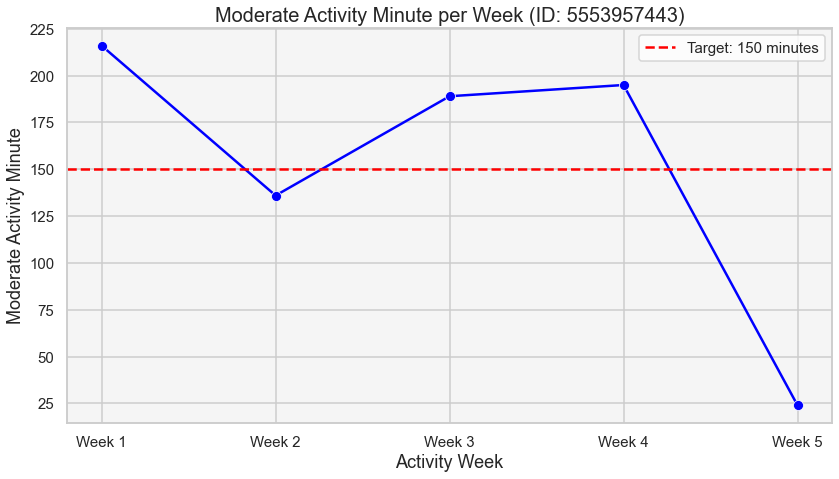

In [10]:
# Set seaborn style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Define a color palette
palette = sns.color_palette("husl", 1)

# Setting the figure size and background
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_facecolor("#f5f5f5")

# Plotting the data using seaborn
sns.lineplot(data=activity_df, x='Activity Week', y='Moderate Activity Minute', color='blue', palette=palette, lw=2.5, marker="o", markersize=10)
 
# Adding a horizontal target line
plt.axhline(150, color='red', linestyle='--', linewidth=2.5, label='Target: 150 minutes')

# Setting xticks to ensure all weeks are shown
plt.xticks(ticks=activity_df['Activity Week'])

# Adding title and labels with customized font sizes
plt.title('Moderate Activity Minute per Week (ID: 5553957443)', fontsize=20)
plt.ylabel('Moderate Activity Minute', fontsize=18)
plt.xlabel('Activity Week', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.legend(fontsize=15)

plt.tight_layout()
plt.show()
    

1. **Setting Up Visualization Style and Context:**
To ensure our plot looks appropriate, we begin by setting up a consistent style and context. The whitegrid style provides a white background with faint grid lines, making it easier to read the graph. The talk context adjusts the scaling of the plot elements, making it suitable for presentations.
2. **Defining a Color Palette:**
We define a color palette using Seaborn's color_palette function. This will help in maintaining color consistency across the plot. Here, we've chosen the "husl" palette and specified we need only one color.
3. **Initiating the Plot:**
We set the size and background color for our plot. This creates a plot of size 12x7 inches with a light gray background.
4. **Plotting the Data:**
We use Seaborn's lineplot function to visualize the moderate activity data. The data is plotted with blue lines, circular markers, and the markers are sized for better visibility.
5. **Highlighting the Target:**
We add a dashed red line to represent the target value of 150 minutes.
6. **Adjusting Axes and Labels:**
This ensures that all weeks are shown on the x-axis. We then add a title and label our axes.
7. **Displaying the Plot:**
Lastly, we finalize our plot layout and display it.
8. **Plot Interpretation:**
As seen from the graph, person ID: 5553957443 has achieved the recommendation of at least 150 minutes of moderate activity per week in week 1, week 3 and week 4. This implies that the person is concious about their physical health and is trying to meet the guidelines for physical activity. Since there is a missed target in week 2 and week 5, there might be improvement in terms of maintaining consistency.

---
# HELP RECEIVED
- I have used generative AI such as chat gpt to produce and debug codes specifically on "Enhancing the Dataset with Weekly Labels" and "Analyzing Moderate-Activity Minutes on a Weekly Basis".
- Used seaborn references from pydata.org on "husl" palette to indentify the best consistent colouring across the plot.
- On "Visualizing Weekly Moderate Activity Data", I have used chatgpt to give me the seaborn plot framework. I have change the font size of the graph, and alter the line plot based on seaborn.lineplot from seaborn.pydata.org.
- Discussed the best way to interpret the definition of moderate activity with group members, between the methods of "averaging the step count per minute and classified it as moderate activity" by Jialu or "100 steps per minute as moderate activity based on recognised research" by Andrey. I have chose 100 steps per minute as my measurement.

---
# REFERENCES
- Harvard Health Publishing. (2018, October). Walk this way - Harvard Health. Harvard Health; Harvard Health. https://www.health.harvard.edu/heart-health/walk-this-way <br><br>

- Tudor-Locke, C., Ducharme, S. W., Aguiar, E. J., Schuna, J. M., Barreira, T. V., Moore, C. C., Chase, C. J., Gould, Z. R., Amalbert-Birriel, M. A., Mora-Gonzalez, J., Chipkin, S. R., & Staudenmayer, J. (2020). Walking cadence (steps/min) and intensity in 41 to 60-year-old adults: the CADENCE-adults study. International Journal of Behavioral Nutrition and Physical Activity, 17(1). https://doi.org/10.1186/s12966-020-01045-z <br><br>

- Tudor-Locke, C., Han, H., Aguiar, E. J., Barreira, T. V., Schuna Jr, J. M., Kang, M., & Rowe, D. A. (2018). How fast is fast enough? Walking cadence (steps/min) as a practical estimate of intensity in adults: a narrative review. British Journal of Sports Medicine, 52(12), 776–788. https://doi.org/10.1136/bjsports-2017-097628 <br><br>

- seaborn.lineplot — seaborn 0.11.2 documentation. (n.d.). Seaborn.pydata.org. https://seaborn.pydata.org/generated/seaborn.lineplot.html <br><br>

- seaborn.husl_palette — seaborn 0.13.0 documentation. (n.d.). Seaborn.pydata.org. Retrieved October 9, 2023, from https://seaborn.pydata.org/generated/seaborn.husl_palette.html <br><br>

- OpenAI. (2022, November 30). ChatGPT. Chat.openai.com. https://chat.openai.com

